# 3. 使用Python进行数据分析

## 3-1 使用Python进行描述统计：单变量

### 3-1-1统计分析与scipy

In [1]:
import scipy as sp
import numpy as np

In [2]:
%precision 3

'%.3f'

### 3-1-2 单变量数据的操作

In [6]:
fish_data = np.random.randint(2,6,10)
fish_data

array([5, 5, 3, 4, 3, 5, 5, 3, 4, 4])

### 3-1-3 实现 总和与样本容量

In [8]:
np.sum(fish_data)

41

In [9]:
len(fish_data)

10

### 3-1-4 实现 均值（期望值）

In [10]:
np.mean(fish_data)

4.1

### 3-1-5 样本方差

In [16]:
np.var(fish_data,ddof=0)

0.6900000000000001

### 3-1-6 无偏方差

In [19]:
np.var(fish_data,ddof=1) #无偏方差

0.7666666666666667

### 3-1-7 标准差

In [20]:
np.std(fish_data)

0.8306623862918076

In [21]:
np.std(fish_data,ddof=1) #无偏标准差

0.8755950357709131

### 3-1-8 标准化

> 标准化：把均值转化为0，方差转化为1.

In [33]:
fish_data

array([5, 5, 3, 4, 3, 5, 5, 3, 4, 4])

In [34]:
np.mean(fish_data)

4.1

In [35]:
np.std(fish_data)

0.8306623862918076

In [36]:
from sklearn import preprocessing #标准化

In [37]:
mean_std_fish_data=preprocessing.scale(fish_data)
mean_std_fish_data

array([ 1.083,  1.083, -1.324, -0.12 , -1.324,  1.083,  1.083, -1.324,
       -0.12 , -0.12 ])

In [39]:
mean_std_fish_data.mean()

4.2188474935755947e-16

In [40]:
mean_std_fish_data.std()

0.9999999999999998

### 3-1-9 其他统计量

In [41]:
np.amax(fish_data)

5

In [42]:
np.amin(fish_data)

3

In [43]:
np.median(fish_data)

4.0

### 3-1-10 四分位数

In [44]:
fish_data

array([5, 5, 3, 4, 3, 5, 5, 3, 4, 4])

In [46]:
np.percentile(fish_data,25)

3.25

In [47]:
np.percentile(fish_data,75)

5.0

In [48]:
np.percentile(fish_data,(0,25,75,100))

array([3.  , 3.25, 5.  , 5.  ])

## 3-2 使用Python进行描述统计：多变量

### 3-2-4 多变量数据的管理

In [49]:
import pandas as pd
import numpy as np
import scipy as sp
%precision 3

'%.3f'

In [50]:
fish_multi = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/3-2-1-fish_multi.csv')
fish_multi

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


### 3-2-5 求各分组的统计量

In [51]:
group = fish_multi.groupby('species')
group.mean()

,length
species,
A,3
B,8


In [53]:
group.std(ddof=1)#求每组的无偏标准差

,length
species,
A,1.0
B,2.0


In [55]:
group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

### 3-2-6 列联表

In [57]:
shoes = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/3-2-2-shoes.csv')
shoes

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [58]:
cross = pd.pivot_table(
    data = shoes,
    values = 'sales',
    aggfunc = 'sum',
    index = 'store',
    columns = 'color'
)
cross

color,blue,red
store,,
osaka,13,9
tokyo,10,15


### 3-2-9 协方差

In [59]:
cov_data = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/3-2-3-cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [63]:
cov_data.cov()

,x,y
x,3.646222,7.673333
y,7.673333,28.011111


### 3-2-10 协方差矩阵

In [69]:
x = cov_data['x']
y = cov_data['y']

In [70]:
np.cov(x,y,ddof=0)

array([[ 3.282,  6.906],
       [ 6.906, 25.21 ]])

In [71]:
np.cov(x,y,ddof=1)#计算分母N-1的协方差矩阵

array([[ 3.646,  7.673],
       [ 7.673, 28.011]])

### 3-2-13皮尔逊相关系数

In [72]:
np.corrcoef(x,y)

array([[1.   , 0.759],
       [0.759, 1.   ]])

### 3-3 基于matplotlib和seaborn的数据可视化

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

### 3-3-3 用pyplot绘制折线图

In [74]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
y = np.random.randint(2,9,10)
y

array([4, 3, 8, 8, 4, 3, 5, 7, 2, 2])

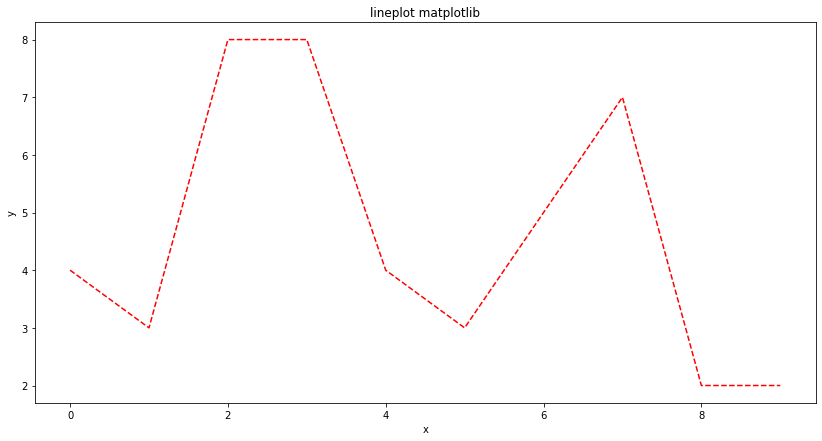

In [78]:
plt.figure(figsize=(14,7))
plt.plot(x,y,'r--')
plt.title('lineplot matplotlib')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 3-3-4 用seaborn和plt绘制折线图

In [79]:
import seaborn as sns
sns.set()

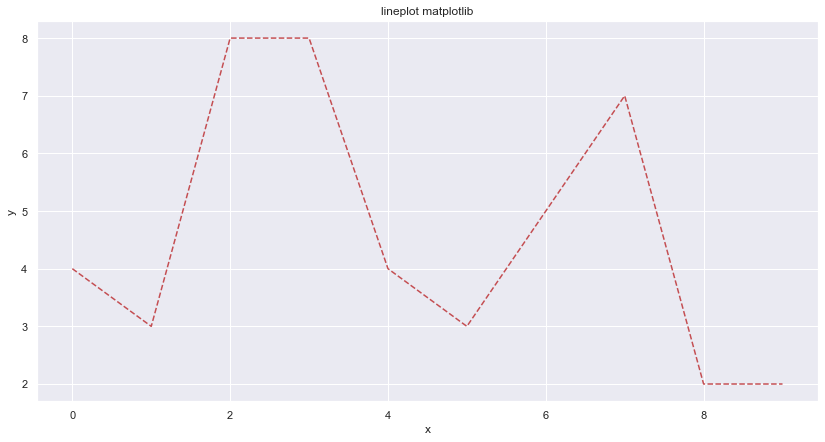

In [80]:
plt.figure(figsize=(14,7))
plt.plot(x,y,'r--')
plt.title('lineplot matplotlib')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 3-3-5 用seaborn绘制直方图

In [81]:
fish_data = np.random.randint(2,9,10)
fish_data

array([2, 3, 7, 5, 6, 7, 8, 3, 5, 5])

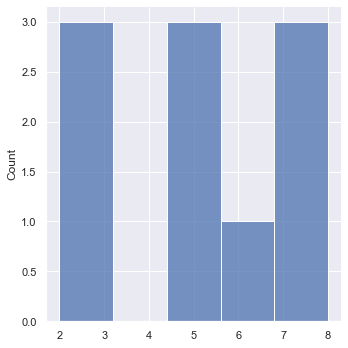

In [87]:
sns.displot(fish_data,bins=5,color='b',kde=False)#禁用核密度估计

### 3-3-6 使用核密度估计将直方图平滑化

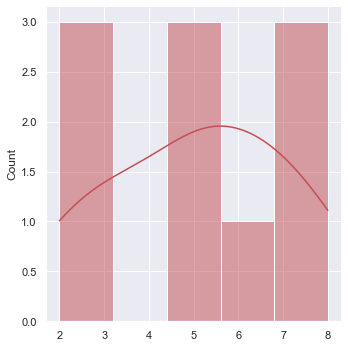

In [93]:
sns.displot(fish_data,kde=True,color='r',)

### 3-3-7 两个变量的直方图

In [94]:
fish_multi = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/3-3-2-fish_multi_2.csv')
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [95]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [96]:
length_a = fish_multi.query('species == "A"')['length']
length_b = fish_multi.query('species == "B"')['length']

In [100]:
length_a[:3]

0    2
1    3
2    3
Name: length, dtype: int64

In [99]:
length_b[:3]

10    5
11    6
12    6
Name: length, dtype: int64

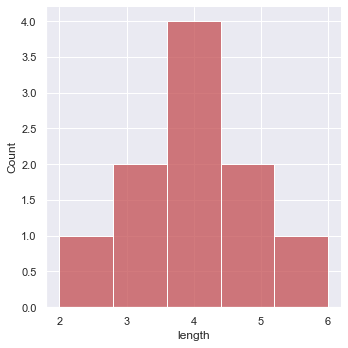

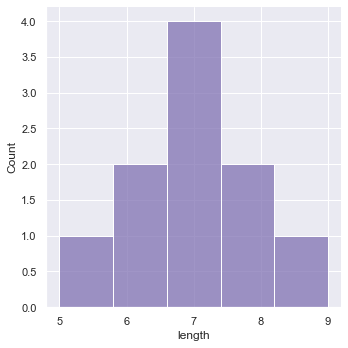

In [101]:
sns.displot(length_a,bins=5,color='r',kde=False)
sns.displot(length_b,bins=5,color='m',kde=False)

### 3-3-8 将多变量可视化的代码

sns. 函数名(
  x = "x 轴对应的列名",
  y = "y 轴对应的列名",
  data = 数据帧,
  其他参数
)


### 3-3-9 箱型图

<AxesSubplot:xlabel='species', ylabel='length'>

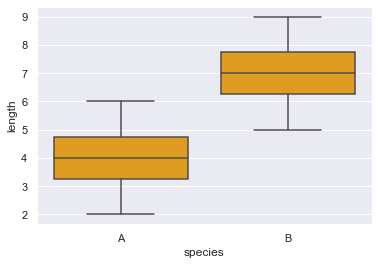

In [105]:
sns.boxplot(x='species',y='length',data=fish_multi,color='orange')

<AxesSubplot:xlabel='species', ylabel='length'>

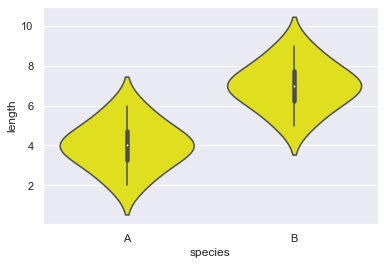

In [109]:
sns.violinplot(x='species',y='length',data=fish_multi,color='yellow')

### 3-3-11 条形图

<AxesSubplot:xlabel='species', ylabel='length'>

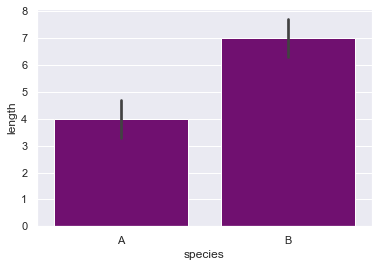

In [110]:
sns.barplot(x='species',y='length',data=fish_multi,color='purple')

### 3-3-12 散点图

In [112]:
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


<AxesSubplot:xlabel='x', ylabel='y'>

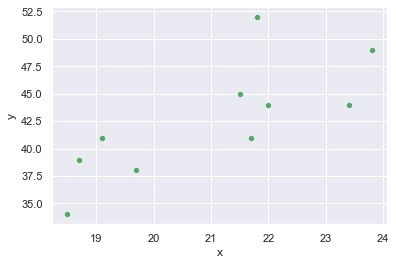

In [117]:
sns.scatterplot(x = 'x',y = 'y',data=cov_data,color='g')

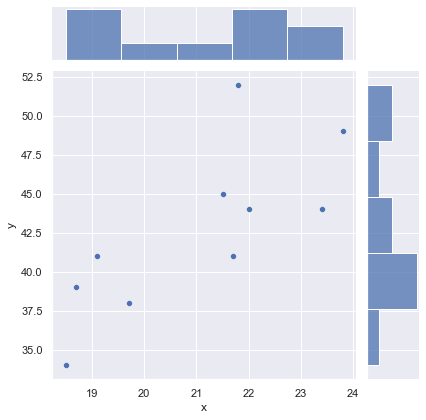

In [120]:
sns.jointplot(x = 'x', y='y',data=cov_data,)

### 3-3-13 散点图矩阵

In [121]:
iris = sns.load_dataset('iris')
iris.head(n=3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [122]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


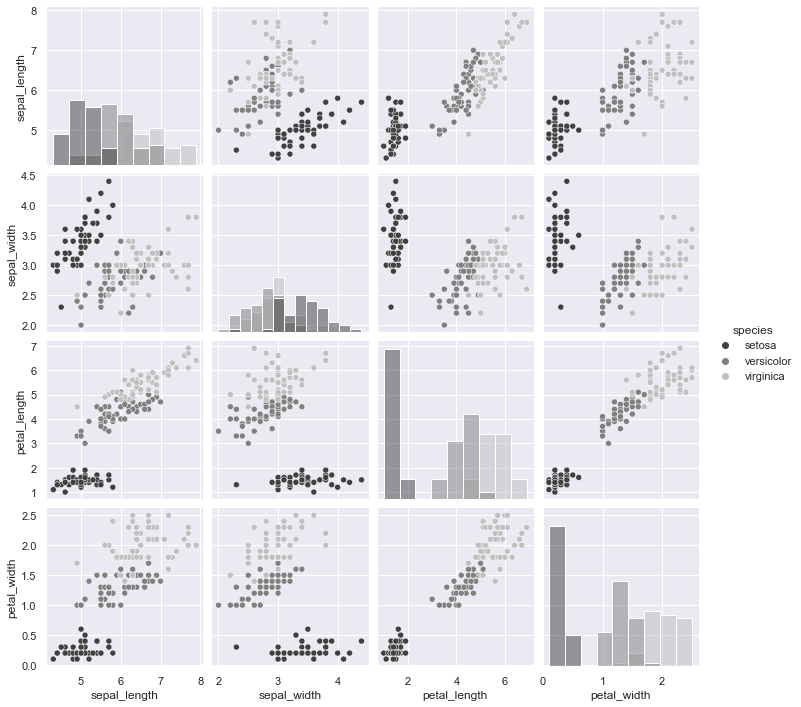

In [126]:
sns.pairplot(iris,hue='species',palette='gray',diag_kind='hist')

## 3-4 用Python模拟抽样

In [127]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [128]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

### 3-4-3 在只有5条鱼的湖中抽样

In [130]:
fish_5 = np.arange(2,7,)
fish_5

array([2, 3, 4, 5, 6])

In [131]:
np.random.choice(fish_5,size=1,replace=False)

array([4])

In [132]:
np.random.choice(fish_5,size=3,replace=False)

array([2, 3, 4])

In [135]:
np.random.seed(1)
np.mean(
    np.random.choice(fish_5,size=3,replace=False)
)

4.333333333333333

### 3-4-6 从鱼较多的湖中抽样

In [136]:
fish_100000 = pd.read_csv(
    '/Users/meininghang/Downloads/【源码】用Python动手学统计学/3-4-1-fish_length_100000.csv'
)['length']
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [137]:
len(fish_100000)

100000

In [138]:
sampling_result = np.random.choice(fish_100000,size=10,replace=False)
sampling_result

array([4.091, 5.465, 3.426, 4.287, 4.244, 4.282, 4.29 , 5.087, 2.769,
       5.296])

In [139]:
np.mean(sampling_result)

4.3235970793805025

### 3-4-7总体分布

In [140]:
np.mean(fish_100000)

4.000

In [141]:
np.std(fish_100000)

0.800

In [142]:
np.std(fish_100000,ddof=1)

0.800

In [144]:
np.var(fish_100000,ddof=0)

0.640

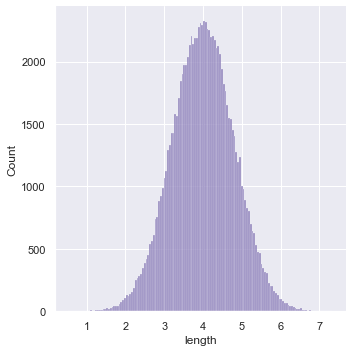

In [148]:
sns.displot(fish_100000,kde=False,color='m')

### 3-4-8 对比总体分布和正态分布的概率密度函数

In [149]:
x = np.arange(1,7.1,0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [151]:
stats.norm.pdf(x=x,loc=4,scale=.8)#loc为均值，scale为标准差

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

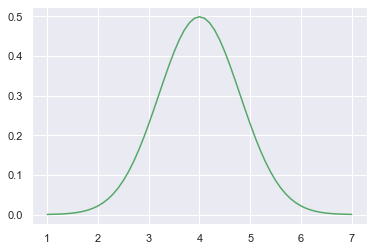

In [152]:
plt.plot(x,stats.norm.pdf(x=x,loc=4,scale=.8),color='g')

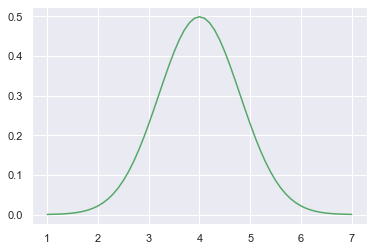

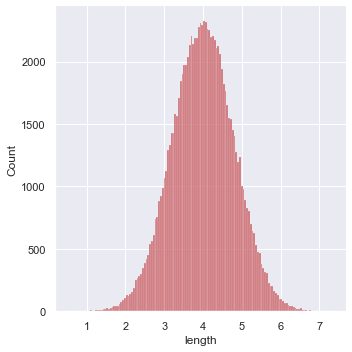

In [159]:
plt.plot(x,stats.norm.pdf(x=x,loc=4,scale=.8),color='g')
sns.displot(fish_100000,kde=False,color='r')

### 3-4-9 抽样过程的抽象描述

In [160]:
sampling_norm = stats.norm.rvs(
    loc=4,scale=0.8,size=10
)
sampling_norm

array([4.037, 3.498, 4.322, 5.295, 5.499, 2.905, 4.437, 4.665, 3.786,
       4.569])

In [161]:
np.mean(sampling_norm)

4.301401664573935

## 3-5 样本统计量的性质

In [162]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [163]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 设置浮点数打印精度
%precision 3
# 在Jupyter Notebook 里显示图形
%matplotlib inline

In [164]:
population = stats.norm(loc=4,scale=0.8)

In [165]:
population

### 3-5-4 多次计算样本均值

In [166]:
sample_mean_array = np.zeros(10000)

In [169]:
np.random.seed(1)
for i in range(10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)

In [170]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

### 3-5-5 样本均值的均值和总体均值相近

In [171]:
np.mean(sample_mean_array)

4.004202422791747

In [172]:
np.std(sample_mean_array,ddof=1)

0.2513580850860402

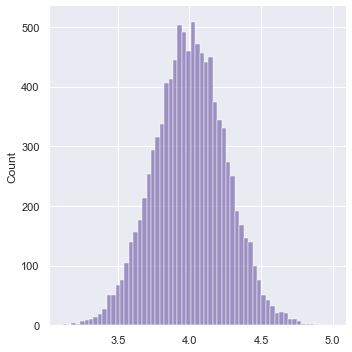

In [174]:
sns.displot(sample_mean_array,color='m')

### 3-5-6 样本容量越大，样本均值越接近总体均值

In [175]:
size_array = np.arange(10,100100,100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [176]:
sample_mean_array_size = np.zeros(len(size_array))

In [177]:
np.random.seed(1)
for i in range(len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

Text(0, 0.5, 'sample mean')

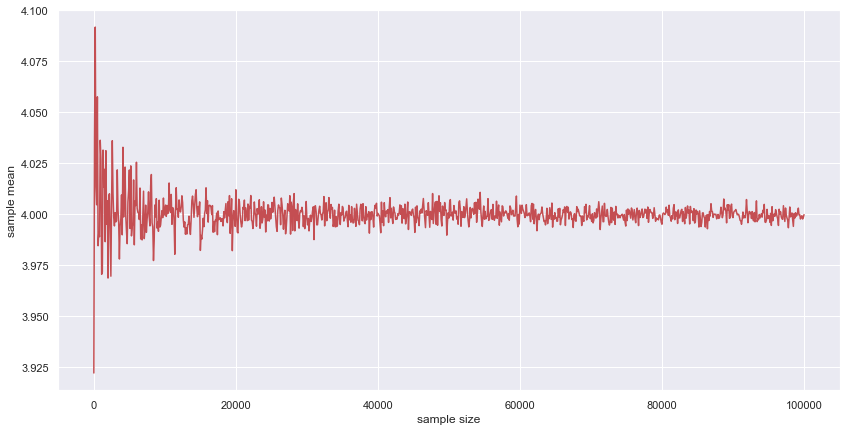

In [179]:
plt.figure(figsize=(14,7))
plt.plot(size_array,sample_mean_array_size,color='r')
plt.xlabel('sample size')
plt.ylabel('sample mean')

### 3-5-7 定义用了计算样本均值的函数

In [180]:
def calc_sample_mean(size,n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [181]:
np.random.seed(1)
np.mean(calc_sample_mean(10,10000))

4.004202422791747

### 3-5-8 不同样本容量所得的样本均值的分布

In [184]:
np.random.seed(1)
#样本容量10
size_10 = calc_sample_mean(size=10,n_trial=10000)
size_10_df = pd.DataFrame({
    'sample_mean':size_10,
    'size':np.tile('size 10',10000)
})
#样本容量20
size_20 = calc_sample_mean(size=20,n_trial=10000)
size_20_df = pd.DataFrame({
    'sample_mean':size_20,
    'size':np.tile('size 20',10000)
})
#样本容量30
size_30 = calc_sample_mean(size=30,n_trial=10000)
size_30_df = pd.DataFrame({
    'sample_mean':size_30,
    'size':np.tile('size 30',10000)
})
#拼接表格
sim_result=pd.concat([
    size_10_df,size_20_df,size_30_df
])
sim_result.head()

,sample_mean,size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10
3,3.857140,size 10
4,4.184654,size 10


<AxesSubplot:xlabel='size', ylabel='sample_mean'>

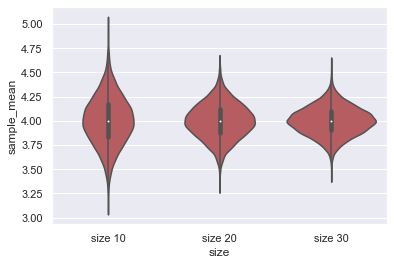

In [185]:
sns.violinplot(x='size',y='sample_mean',data=sim_result,color='r')

### 3-5-9 样本均值的标准差小于总体标准差

In [186]:
size_array = np.arange(2,102,2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [187]:
sample_mean_std_array = np.zeros(len(size_array))

In [188]:
np.random.seed(1)
for i in range(len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i],n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean,ddof=1)

Text(0, 0.5, 'mean_std value')

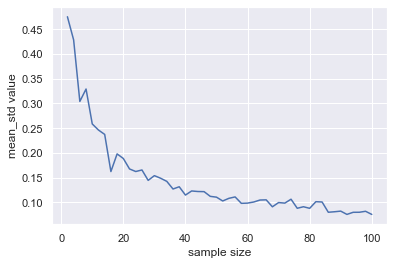

In [189]:
plt.plot(size_array,sample_mean_std_array)
plt.xlabel('sample size')
plt.ylabel('mean_std value')

### 3-5-10 标准误差

In [193]:
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

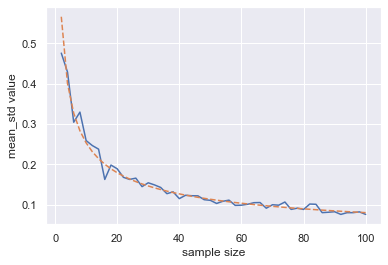

In [195]:
plt.plot(size_array,sample_mean_std_array)
plt.plot(size_array,standard_error,ls='--')
plt.xlabel('sample size')
plt.ylabel('mean_std value')

In [196]:
sample_var_array = np.zeros(10000)
np.random.seed(1)
for i in range(10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample,ddof=0)

In [197]:
np.mean(sample_var_array)

0.5746886877332101

### 3-5-13 采用无偏方差消除偏离

In [198]:
unbias_var_array = np.zeros(10000)
np.random.seed(1)
for i in range(10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = np.var(sample,ddof=1)
np.mean(unbias_var_array)

0.6385429863702334

### 3-5-14 样本容量越大，其无偏方差越接近总体方差

In [199]:
size_array = np.arange(10,100100,100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [200]:
unbias_var_array_size = np.zeros(len(size_array))

In [202]:
np.random.seed(1)
for i in range(len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample,ddof=1)

Text(0, 0.5, 'unbias var')

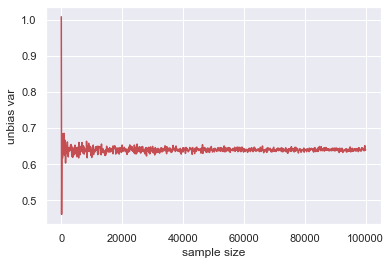

In [203]:
plt.plot(size_array,unbias_var_array_size,color='r')
plt.xlabel('sample size')
plt.ylabel('unbias var')

### 3-5-19 中心极限定理

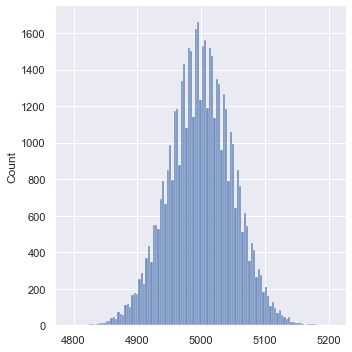

In [205]:
#样本容量和试验次数
n_size = 10000
n_trail = 50000
#正面为1，背面为0
coin = np.array([0,1])
#出现正面的次数
count_coin = np.zeros(n_trail)
#投掷n_size次硬币，此实验进行n_trail次
np.random.seed(1)
for i in range(n_trail):
    count_coin[i] = np.sum(np.random.choice(coin,size=n_size,replace=True))
#绘制zhifangtu
sns.displot(count_coin,)

## 3-6 正态分布及其应用

In [206]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [207]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 设置浮点数打印精度
%precision 3
# 在Jupyter Notebook 里显示图形
%matplotlib inline

### 3-6-2 概率密度

In [208]:
np.pi

3.142

In [209]:
np.exp(1)

2.718281828459045

In [210]:
np.exp(0)

1.0

In [211]:
stats.norm.pdf(loc=4,scale=.8,x=3)

0.2283113567362774

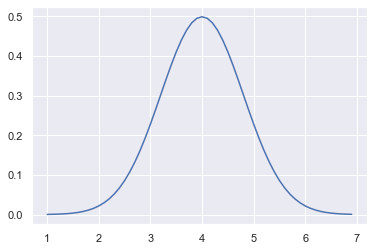

In [216]:
x_plot = np.arange(1,7,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=4,scale=.8,))

### 3-6-3 样本小于等于某值的比例

In [217]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc=4,scale=.8,size=100000
)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [218]:
np.sum(simulated_sample <= 3) / len(simulated_sample)

0.10371

### 3-6-5 帕累托分布函数

In [219]:
stats.norm.cdf(loc=4,scale=.8,x=3)

0.10564977366685535

In [220]:
stats.norm.cdf(loc=4,scale=.8,x=4)

0.5

### 3-6-7 百分位数

In [221]:
stats.norm.ppf(loc=4,scale=.8,q=0.025)

2.4320288123679563

In [222]:
left = stats.norm.cdf(loc=4,scale=.8,x=3)
stats.norm.ppf(loc=4,scale=0.8,q=left)

3.0000000000000004

In [223]:
#左侧概率为50%的百分位数就是均值
stats.norm.ppf(loc=4,scale=.8,q=.5)

4.0

### 3-6-8 标准正态分布

### 3-6-10 t值的样本分布

In [225]:
#随机种子
np.random.seed(1)
#存放t值的空间
t_value_array = np.zeros(10000)
#实例化一个正态分布
norm_dist = stats.norm(loc=4,scale=.8)
#开始模拟
for i in range(10000):
    sample = norm_dist.rvs(size=10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample,ddof=1)
    sample_se = sample_std / np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

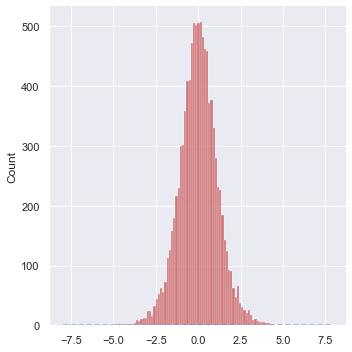

In [226]:
#t值的直方图
sns.displot(t_value_array,color='r')
#标准正态分布的概率密度
x = np.arange(-8,8,0.1)
plt.plot(x,stats.norm.pdf(x=x),'b--')

### 3-6-12 t分布

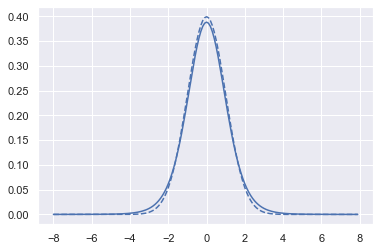

In [229]:
plt.plot(x,stats.norm.pdf(x=x),'b--')
plt.plot(x,stats.t.pdf(x=x,df=9))

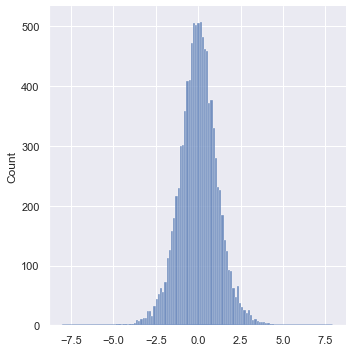

In [232]:
sns.displot(t_value_array)
plt.plot(x,stats.t.pdf(x=x,df=9))

t 分布的意义就是在总体方差未知时也可以研究样本均值的分布。

## 3-7 参数估计

In [233]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [234]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 设置浮点数打印精度
%precision 3
# 在Jupyter Notebook 里显示图形
%matplotlib inline

In [235]:
fish = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/3-7-1-fish_length.csv')['length']
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

### 3-7-4 点估计

In [236]:
mu = np.mean(fish)

In [237]:
mu

4.187

In [238]:
sigma_2 = np.var(fish,ddof=1)
sigma_2

0.680

### 3-7-9 区间估计

In [239]:
df = len(fish) - 1
df

9

In [240]:
sigma = np.std(fish,ddof=1)
se = sigma / np.sqrt(len(fish))
se

0.2608259396768776

In [241]:
interval = stats.t.interval(
    alpha=0.95,df=df,loc=mu,scale=se
)
interval

(3.597010056835825, 4.777068592173221)

In [244]:
np.round(interval,3)

array([3.597, 4.777])

### 3-7-11 决定置信区间大小的因素

In [247]:
se2 = (sigma*10) / np.sqrt(len(fish))
np.around(
    stats.t.interval(
        alpha=.95, df=df, loc=mu, scale = se2
),3)

array([-1.713, 10.087])

In [248]:
df2 = (len(fish)*10) - 1
se3 = sigma / np.sqrt(len(fish)*10)
np.around(
    stats.t.interval(alpha=.95,df=df2,loc=mu,scale=se3),3
)

array([4.023, 4.351])

In [249]:
stats.t.interval(
    alpha=.99,df=df,loc=mu,scale=se
)

(3.3393979149413977, 5.034680734067649)

### 3-7-12 区间估计结果含义

In [255]:
be_included_array = np.zeros(200000,dtype='bool')
be_included_array

array([False, False, False, ..., False, False, False])

In [256]:
#执行两万次求95%置信区间的操作
#如果置信区间包含总体均值（4），就为True
np.random.seed(1)
norm_dist = stats.norm(loc=4,scale=.8)
for i in range(200000):
    sample = norm_dist.rvs(size=10)
    df = len(be_included_array) - 1
    mu = np.mean(sample)
    std = np.std(sample,ddof=1)
    se = std / np.sqrt(len(sample))
    interval = stats.t.interval(.95,df,mu,se)
    if(interval[0]<=4 and interval[1]>=4):
        be_included_array[i] = True

In [257]:
sum(be_included_array) / len(be_included_array)

0.91813

## 3-8 假设检验

In [258]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


### 3-8-13 t检验

In [259]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 设置浮点数打印精度
%precision 3
# 在Jupyter Notebook 里显示图形
%matplotlib inline

In [260]:
junk_food = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/3-8-1-junk-food-weight.csv')['weight']
junk_food.head()

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

### 3-8-14 计算t值

In [261]:
mu = np.mean(junk_food)
mu

55.385

In [262]:
df = len(junk_food) - 1
df

19

In [263]:
sigma = np.std(junk_food,ddof=1)
se = sigma / np.sqrt(len(junk_food))
se

1.9579276805755885

In [264]:
t_value = (mu - 50) / se
t_value

2.7503396831713434

### 3-8-15 计算p值

In [267]:
alpha = stats.t.cdf(t_value,df=df)
np.around((1-alpha) * 2, 3)

0.013

In [268]:
stats.ttest_1samp(junk_food,50)

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

## 3-9 均值差的检验

### 3-9-4 配对样本t检验

In [269]:
paired_test_data = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/3-9-1-paired-t-test.csv')
paired_test_data

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1
5,A,after,36.8
6,B,after,36.1
7,C,after,36.8
8,D,after,37.1
9,E,after,36.9


In [270]:
before = np.array(
    paired_test_data.query('medicine=="before"')['body_temperature']
)
after = np.array(
    paired_test_data.query('medicine=="after"')['body_temperature']
)
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [271]:
stats.ttest_1samp(diff,0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [272]:
stats.ttest_rel(after,before)

Ttest_relResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

### 3-9-6 实现独立样本t检验

In [275]:
stats.ttest_ind(after,before,equal_var=False)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

## 3-10 卡方检验(X^2检验)

### 3-10-6 列联表（卡方检验）

In [276]:
click_data = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/3-10-1-click_data.csv')
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [278]:
cross = pd.pivot_table(
    data = click_data,
    values = 'freq',
    aggfunc = 'sum',
    index = 'color',
    columns = 'click',
)
cross

click,click,not
color,,
blue,20,230
red,10,40


In [279]:
sp.stats.chi2_contingency(cross,correction=False)

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))